In [1]:
import numpy as np
import pandas as pd


Pandas is used for structured data manipulation, while NumPy supports numerical operations required for later analysis.

__Confirm where the notebook is running:__

In [7]:
import os
os.getcwd()


'/Volumes/LaCie 1/code/Aura'

__Import dataset:__

In [8]:
df = pd.read_csv("data/NSMES1988.csv")


__verification:__

In [9]:
import os
os.listdir("data")

['NSMES1988.csv', '._NSMES1988.csv']

__Inspect the dataset structure:__

__`df.shape`__

A Pandas DataFrame attribute that tells you the size of the dataset.
___

In [16]:
df.shape

(4406, 19)

⬆️ __This dataset contains 4,406 rows and 18 columns__

__`df.columns`__

A Pandas DataFrame attribute that shows you the names of all columns in the dataset.
___

In [18]:
df.columns

Index(['Unnamed: 0', 'visits', 'nvisits', 'ovisits', 'novisits', 'emergency',
       'hospital', 'health', 'chronic', 'adl', 'region', 'age', 'gender',
       'married', 'school', 'income', 'employed', 'insurance', 'medicaid'],
      dtype='object')

⬆️ __The dataset includes variables related to healthcare utilization, demographics, and socioeconomic characteristics.__

__`df.head()`__

A Pandas DataFrame method used to quickly preview the first few rows of a dataset.
___

In [23]:
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


* __Each row (0-4) represents one individual / one record.__
* __Each column has integer counts of health-care usage:__
  | Column      | Meaning               |
| ----------- | --------------------- |
| `visits`    | Total medical visits  |
| `nvisits`   | Non-emergency visits  |
| `ovisits`   | Outpatient visits     |
| `novisits`  | Non-outpatient visits |
| `emergency` | Emergency room visits |
| `hospital`  | Hospital admissions   |

* __The next colums have health status indicators (categorical + numeric):__
  | Column    | Type        | Meaning                                          |
| --------- | ----------- | ------------------------------------------------ |
| `health`  | categorical | self-reported health (`poor`, `average`)         |
| `chronic` | numeric     | number of chronic conditions                     |
| `adl`     | categorical | activities of daily living (`normal`, `limited`) |

* __The next colums have demographics and socioeconomic data:__
  | Column      | Meaning                                            |
| ----------- | -------------------------------------------------- |
| `region`    | geographic grouping                                |
| `age`       | age (likely scaled or transformed — not raw years) |
| `gender`    | male / female                                      |
| `married`   | marital status                                     |
| `school`    | years of education                                 |
| `income`    | income (likely normalized or logged)               |
| `employed`  | employment status                                  |
| `insurance` | insured or not                                     |
| `medicaid`  | Medicaid coverage                                  |


  
  


__`df.info()`__

A Pandas DataFrame method that provides a concise summary of the dataset’s structure and metadata.
___

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 619.7+ KB


```javascript
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
```

* __Your data is a Pandas DataFrame__

* __It contains 4,406 rows__

* __The index runs from 0 to 4405__

* __The index is implicit (not a column)__

__Data columns (total 19 columns) = You have 19 variables (features).__

| Field          | Meaning                         |
| -------------- | ------------------------------- |
| Column name    | Name of the variable            |
| Non-Null Count | How many values are NOT missing |
| Dtype          | Data type Pandas assigned       |




__Check for missing values:__
| Command             | Output meaning                                         |
| ------------------- | ------------------------------------------------------ |
| `df.isnull().sum()` | How many missing values per column                     |
| `df.isnull().any()` | Whether *at least one* missing value exists per column |


In [26]:
df.isnull().sum()

visits       0
nvisits      0
ovisits      0
novisits     0
emergency    0
hospital     0
health       0
chronic      0
adl          0
region       0
age          0
gender       0
married      0
school       0
income       0
employed     0
insurance    0
medicaid     0
dtype: int64

⬆️  __Every column has zero missing (null/NaN) values.__

In [27]:
df.isnull().any()

visits       False
nvisits      False
ovisits      False
novisits     False
emergency    False
hospital     False
health       False
chronic      False
adl          False
region       False
age          False
gender       False
married      False
school       False
income       False
employed     False
insurance    False
medicaid     False
dtype: bool

__False = this column contains no missing values__

__If a column had any missing value, it would show True__



In [28]:
df[['age', 'income']].describe()


,age,income
count,4406.000000,4406.000000
mean,7.402406,2.527132
std,0.633405,2.924648
min,6.600000,-1.012500
25%,6.900000,0.912150
50%,7.300000,1.698150
75%,7.800000,3.172850
max,10.900000,54.835100


In [29]:
df[['age', 'income']].dtypes


age       float64
income    float64
dtype: object

In [30]:
df.to_json("NSMES1988.json", orient="records", indent=4)


In [31]:
df.head().to_json(orient="records", indent=4)


'[\n    {\n        "visits":5,\n        "nvisits":0,\n        "ovisits":0,\n        "novisits":0,\n        "emergency":0,\n        "hospital":1,\n        "health":"average",\n        "chronic":2,\n        "adl":"normal",\n        "region":"other",\n        "age":6.9,\n        "gender":"male",\n        "married":"yes",\n        "school":6,\n        "income":2.881,\n        "employed":"yes",\n        "insurance":"yes",\n        "medicaid":"no"\n    },\n    {\n        "visits":1,\n        "nvisits":0,\n        "ovisits":2,\n        "novisits":0,\n        "emergency":2,\n        "hospital":0,\n        "health":"average",\n        "chronic":2,\n        "adl":"normal",\n        "region":"other",\n        "age":7.4,\n        "gender":"female",\n        "married":"yes",\n        "school":10,\n        "income":2.7478,\n        "employed":"no",\n        "insurance":"yes",\n        "medicaid":"no"\n    },\n    {\n        "visits":13,\n        "nvisits":0,\n        "ovisits":0,\n        "novisits"

In [32]:
df.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 2.1 MB


In [33]:
df.memory_usage(deep=True)


Index           132
visits        35248
nvisits       35248
ovisits       35248
novisits      35248
emergency     35248
hospital      35248
health       245760
chronic       35248
adl          243229
region       242788
age           35248
gender       238774
married      227112
school        35248
income        35248
employed     225161
insurance    228127
medicaid     225108
dtype: int64

In [34]:
df.to_csv("NSMES1988new.csv", index=False)


In [39]:
!pip install matplotlib


zsh:1: command not found: pip


Matplotlib is building the font cache; this may take a moment.


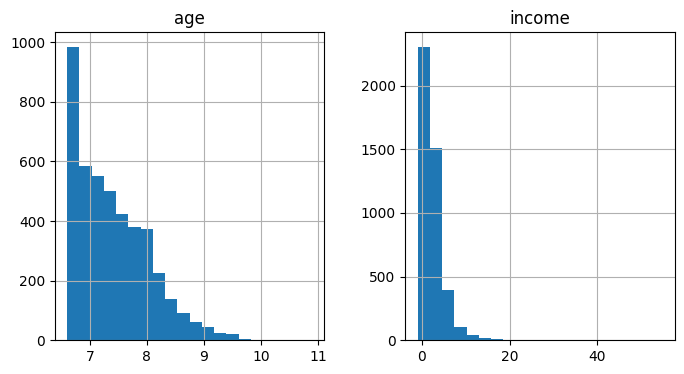

In [42]:
import matplotlib.pyplot as plt

df[['age', 'income']].hist(bins=20, figsize=(8,4))
plt.show()
